In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv('../Data/selected_data/processed_data.csv')

### **Batsman Clustering**

In [2]:
unique_batters = data['batter'].unique()

for batter in unique_batters:
    print(batter)

AJ Finch
M Klinger
TM Head
MC Henriques
AJ Turner
JP Faulkner
N Dickwella
WU Tharanga
EMDY Munaweera
DAS Gunaratne
TAM Siriwardana
CK Kapugedera
S Prasanna
BR Dunk
TD Paine
PJ Cummins
AJ Tye
JA Richardson
BKG Mendis
KMDN Kulasekara
SL Malinga
MD Shanaka
JRMVB Sanjaya
KL Rahul
AT Rayudu
Mandeep Singh
MK Pandey
KM Jadhav
MS Dhoni
AR Patel
R Dhawan
CJ Chibhabha
H Masakadza
R Mutumbami
Sikandar Raza
MN Waller
CT Mutombodzi
E Chigumbura
AG Cremer
N Madziva
PJ Moor
DT Tiripano
T Muzarabani
DS Kulkarni
V Sibanda
T Maruma
Tamim Iqbal
Imrul Kayes
Sabbir Rahman
Shakib Al Hasan
Soumya Sarkar
Mahmudullah
Mosaddek Hossain
Mashrafe Mortaza
Nurul Hasan
Rubel Hossain
NT Broom
KS Williamson
C Munro
CJ Anderson
TC Bruce
C de Grandhomme
Mustafizur Rahman
L Ronchi
JDS Neesham
MJ Santner
GD Phillips
BM Wheeler
TG Southee
TA Boult
HM Amla
Q de Kock
F du Plessis
AB de Villiers
JP Duminy
F Behardien
CH Morris
WD Parnell
JJ Roy
AD Hales
JM Bairstow
JT Smuts
RR Hendricks
DA Miller
SW Billings
LS Livingstone
JC 

In [3]:
# Average score per match of a batsman
batsman_match_runs = data.groupby(['batter', 'match_id'])['runs_by_bat'].sum().reset_index()

batsman_avg_score = batsman_match_runs.groupby('batter')['runs_by_bat'].mean().reset_index()
batsman_avg_score.rename(columns={'runs_by_bat': 'average_score_per_match'}, inplace=True)

print(batsman_avg_score)

                batter  average_score_per_match
0          A Balbirnie                20.423077
1          A Dananjaya                 4.333333
2           A Flintoff                10.857143
3               A Khan                 2.000000
4             A Ndlovu                 8.333333
..                 ...                      ...
964         Zaman Khan                 4.000000
965       Ziaur Rahman                 9.000000
966      Zubaid Akbari                 5.000000
967     Zulfiqar Babar                 9.000000
968  Zulqarnain Haider                 9.000000

[969 rows x 2 columns]


In [4]:
# Maximum number of balls faced in each match
max_balls_faced = data.groupby(['batter', 'match_id'])['balls_faced'].max().reset_index()
print("max_balls_faced")
print(max_balls_faced)

max_balls_faced
                  batter                          match_id  balls_faced
0            A Balbirnie    Afghanistan_Ireland_2018-08-20            9
1            A Balbirnie    Afghanistan_Ireland_2018-08-22            1
2            A Balbirnie    Afghanistan_Ireland_2019-02-21            4
3            A Balbirnie    Afghanistan_Ireland_2019-02-23            4
4            A Balbirnie    Afghanistan_Ireland_2019-02-24           33
...                  ...                               ...          ...
14673     Zulfiqar Babar   Pakistan_West Indies_2014-04-01            4
14674     Zulfiqar Babar   West Indies_Pakistan_2013-07-27           17
14675     Zulfiqar Babar   West Indies_Pakistan_2013-07-28            6
14676  Zulqarnain Haider  Pakistan_South Africa_2010-10-26            4
14677  Zulqarnain Haider  Pakistan_South Africa_2010-10-27           17

[14678 rows x 3 columns]


In [5]:
# Sum up the maximum balls faced in each match
total_balls_faced = max_balls_faced.groupby('batter')['balls_faced'].sum().reset_index()

print(total_balls_faced)

                batter  balls_faced
0          A Balbirnie          887
1          A Dananjaya           72
2           A Flintoff           59
3               A Khan            4
4             A Ndlovu           32
..                 ...          ...
964         Zaman Khan            9
965       Ziaur Rahman           58
966      Zubaid Akbari            8
967     Zulfiqar Babar           27
968  Zulqarnain Haider           21

[969 rows x 2 columns]


In [6]:
# Calculate the total runs scored by each batsman
batsman_total_runs = data.groupby('batter')['runs_by_bat'].sum().reset_index()

print(batsman_total_runs)

                batter  runs_by_bat
0          A Balbirnie         1062
1          A Dananjaya           65
2           A Flintoff           76
3               A Khan            2
4             A Ndlovu           25
..                 ...          ...
964         Zaman Khan            8
965       Ziaur Rahman           72
966      Zubaid Akbari            5
967     Zulfiqar Babar           27
968  Zulqarnain Haider           18

[969 rows x 2 columns]


In [7]:
# Merge batsman_total_runs with max_balls_faced on the 'batter' column
batsman_strike_rate = pd.merge(batsman_total_runs, total_balls_faced, on='batter')

# Calculate strike rate
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['runs_by_bat'] / batsman_strike_rate['balls_faced']) * 100

print(batsman_strike_rate)

                batter  runs_by_bat  balls_faced  strike_rate
0          A Balbirnie         1062          887   119.729425
1          A Dananjaya           65           72    90.277778
2           A Flintoff           76           59   128.813559
3               A Khan            2            4    50.000000
4             A Ndlovu           25           32    78.125000
..                 ...          ...          ...          ...
964         Zaman Khan            8            9    88.888889
965       Ziaur Rahman           72           58   124.137931
966      Zubaid Akbari            5            8    62.500000
967     Zulfiqar Babar           27           27   100.000000
968  Zulqarnain Haider           18           21    85.714286

[969 rows x 4 columns]


In [8]:
# Merge the two metrics into a single DataFrame
batsman_metrics = pd.merge(batsman_avg_score, batsman_strike_rate[['batter', 'strike_rate']], on='batter')

print("Batsman Metrics before Clustering:")
print(batsman_metrics)

Batsman Metrics before Clustering:
                batter  average_score_per_match  strike_rate
0          A Balbirnie                20.423077   119.729425
1          A Dananjaya                 4.333333    90.277778
2           A Flintoff                10.857143   128.813559
3               A Khan                 2.000000    50.000000
4             A Ndlovu                 8.333333    78.125000
..                 ...                      ...          ...
964         Zaman Khan                 4.000000    88.888889
965       Ziaur Rahman                 9.000000   124.137931
966      Zubaid Akbari                 5.000000    62.500000
967     Zulfiqar Babar                 9.000000   100.000000
968  Zulqarnain Haider                 9.000000    85.714286

[969 rows x 3 columns]


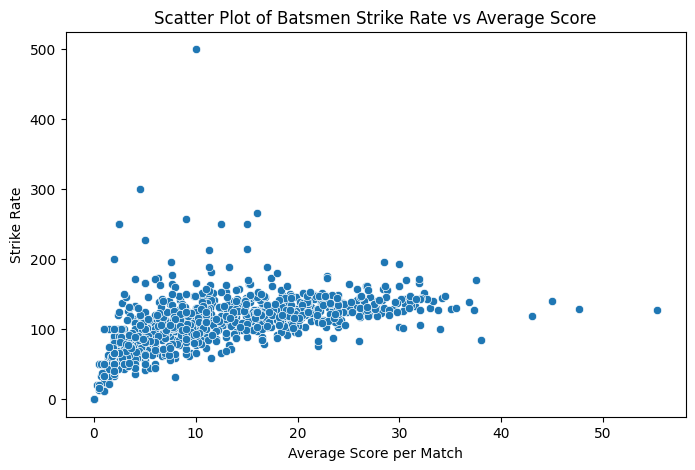

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=batsman_metrics, x='average_score_per_match', y='strike_rate')
plt.title('Scatter Plot of Batsmen Strike Rate vs Average Score')
plt.xlabel('Average Score per Match')
plt.ylabel('Strike Rate')
plt.show()

In [10]:
# Elbow Method
sse = []  # Sum of squared distances to the closest cluster center
k_range = range(1, 11)

k_range = range(1, 11)  # Range of k values to try
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(batsman_metrics[['average_score_per_match', 'strike_rate']])
    sse.append(kmeans.inertia_)

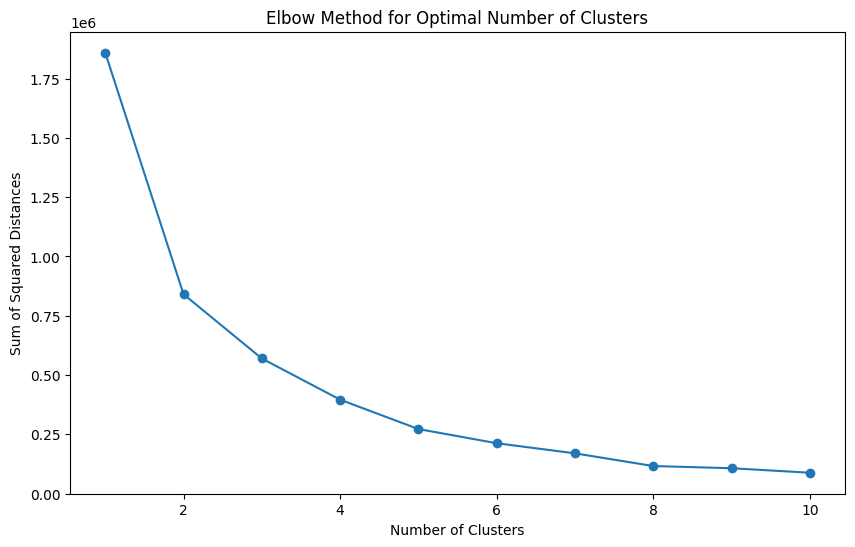

In [11]:
# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [12]:
print("sse: ",sse)

sse:  [1859442.8210125624, 840543.9004304132, 569583.728708274, 395927.6612473277, 271992.2260999651, 212166.3476366483, 169489.29111508877, 115917.67360616477, 106666.49952947612, 87725.74229957118]


In [13]:
# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
batsman_metrics['batsman_cluster'] = kmeans.fit_predict(batsman_metrics[['average_score_per_match', 'strike_rate']])

In [14]:
print("Batsman Metrics after Clustering:")
print(batsman_metrics.head())

Batsman Metrics after Clustering:
        batter  average_score_per_match  strike_rate  batsman_cluster
0  A Balbirnie                20.423077   119.729425                0
1  A Dananjaya                 4.333333    90.277778                0
2   A Flintoff                10.857143   128.813559                1
3       A Khan                 2.000000    50.000000                2
4     A Ndlovu                 8.333333    78.125000                0


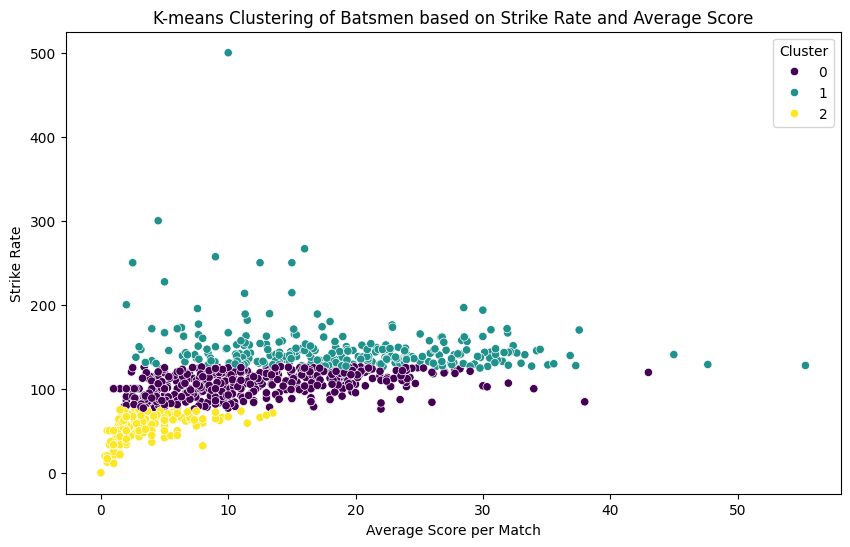

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=batsman_metrics, x='average_score_per_match', y='strike_rate', hue='batsman_cluster', palette='viridis')
plt.title('K-means Clustering of Batsmen based on Strike Rate and Average Score')
plt.xlabel('Average Score per Match')
plt.ylabel('Strike Rate')
plt.legend(title='Cluster')
plt.show()

### **Bowler Clustering**

In [16]:
# Calculate the average wickets per match for each bowler
bowler_wickets = data[data['wicket_type'].notnull()]

bowler_match_wickets = bowler_wickets.groupby(['bowler', 'match_id']).size().reset_index(name='wickets_taken')

bowler_avg_wickets = bowler_match_wickets.groupby('bowler')['wickets_taken'].mean().reset_index()
bowler_avg_wickets.rename(columns={'wickets_taken': 'average_wickets_per_match'}, inplace=True)

In [17]:
print(bowler_avg_wickets)

             bowler  average_wickets_per_match
0       A Dananjaya                  21.787879
1        A Flintoff                  22.142857
2            A Khan                  26.000000
3          A Martin                  18.000000
4          A Mishra                  23.400000
..              ...                        ...
731   Zahid Mahmood                  25.000000
732      Zahir Khan                  21.500000
733      Zaman Khan                  20.000000
734    Ziaur Rahman                  13.857143
735  Zulfiqar Babar                  23.500000

[736 rows x 2 columns]


In [18]:
# Calculate economy rate for each bowler
bowler_stats = data.groupby('bowler').agg(
    total_runs_conceded=pd.NamedAgg(column='total_runs_delivery', aggfunc='sum'),
    total_overs_bowled=pd.NamedAgg(column='over', aggfunc='nunique')
).reset_index()
bowler_stats['economy_rate'] = (bowler_stats['total_runs_conceded'] / bowler_stats['total_overs_bowled'])

In [19]:
print(bowler_stats)

             bowler  total_runs_conceded  total_overs_bowled  economy_rate
0       A Dananjaya                  974                  19     51.263158
1        A Flintoff                  164                  14     11.714286
2            A Khan                   34                   4      8.500000
3          A Martin                   20                   3      6.666667
4          A Mishra                  247                  15     16.466667
..              ...                  ...                 ...           ...
731   Zahid Mahmood                   40                   4     10.000000
732      Zahir Khan                   37                   5      7.400000
733      Zaman Khan                  210                  12     17.500000
734    Ziaur Rahman                  160                  13     12.307692
735  Zulfiqar Babar                  162                  14     11.571429

[736 rows x 4 columns]


In [20]:
# Merge the metrics into a single DataFrame
bowler_metrics = pd.merge(bowler_avg_wickets, bowler_stats[['bowler', 'economy_rate']], on='bowler')
print("Bowler Metrics before Clustering:")
print(bowler_metrics)

Bowler Metrics before Clustering:
             bowler  average_wickets_per_match  economy_rate
0       A Dananjaya                  21.787879     51.263158
1        A Flintoff                  22.142857     11.714286
2            A Khan                  26.000000      8.500000
3          A Martin                  18.000000      6.666667
4          A Mishra                  23.400000     16.466667
..              ...                        ...           ...
731   Zahid Mahmood                  25.000000     10.000000
732      Zahir Khan                  21.500000      7.400000
733      Zaman Khan                  20.000000     17.500000
734    Ziaur Rahman                  13.857143     12.307692
735  Zulfiqar Babar                  23.500000     11.571429

[736 rows x 3 columns]


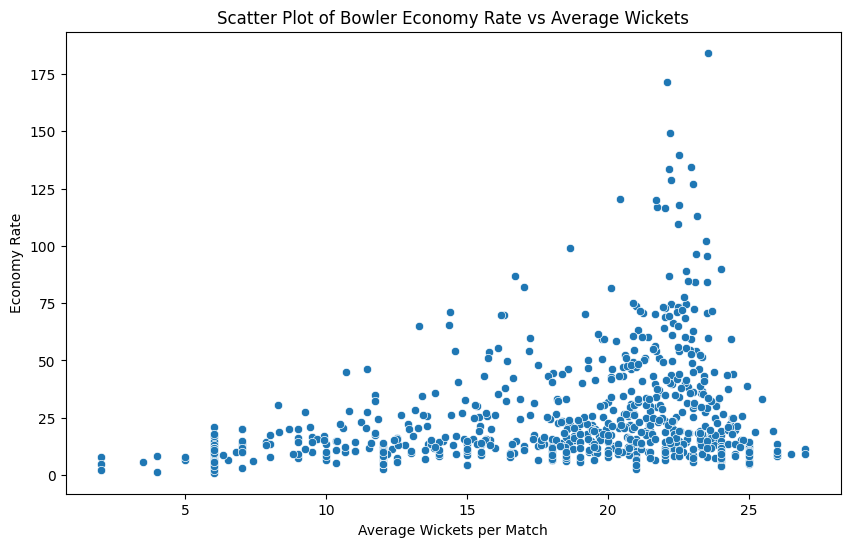

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bowler_metrics, x='average_wickets_per_match', y='economy_rate')
plt.title('Scatter Plot of Bowler Economy Rate vs Average Wickets')
plt.xlabel('Average Wickets per Match')
plt.ylabel('Economy Rate')
plt.show()

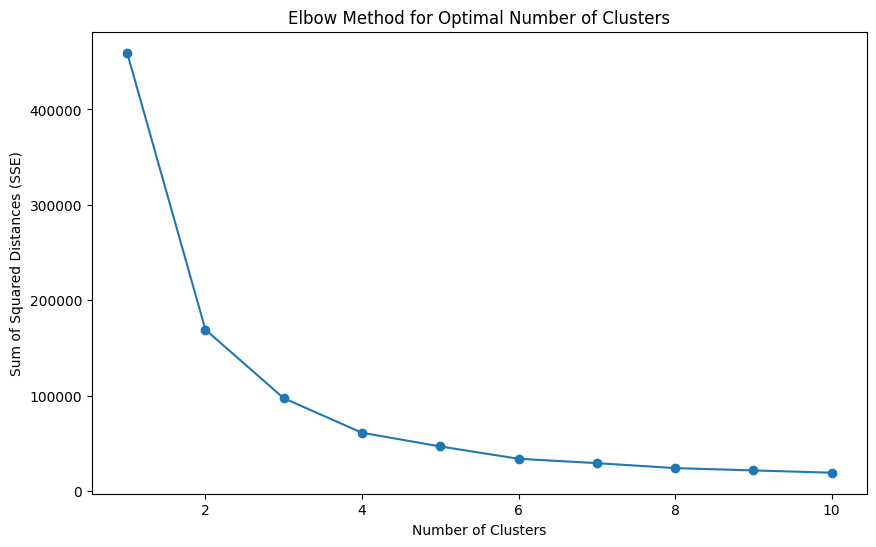

In [22]:
#Elbow method
sse = []  # Sum of squared distances to the closest cluster center
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bowler_metrics[['average_wickets_per_match', 'economy_rate']])
    sse.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [23]:
print("sse: ",sse)

sse:  [459514.713784877, 169106.16889190068, 97186.95439003874, 60960.64326263433, 46578.08869799874, 33673.465360697155, 29065.061508933446, 23884.429480337905, 21436.892029550887, 19029.801081773687]


In [24]:
# Cluster bowlers using K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
bowler_metrics['bowler_cluster'] = kmeans.fit_predict(bowler_metrics[['average_wickets_per_match', 'economy_rate']])

print("Bowler Metrics after Clustering:")
print(bowler_metrics.head())

Bowler Metrics after Clustering:
        bowler  average_wickets_per_match  economy_rate  bowler_cluster
0  A Dananjaya                  21.787879     51.263158               0
1   A Flintoff                  22.142857     11.714286               2
2       A Khan                  26.000000      8.500000               2
3     A Martin                  18.000000      6.666667               2
4     A Mishra                  23.400000     16.466667               2


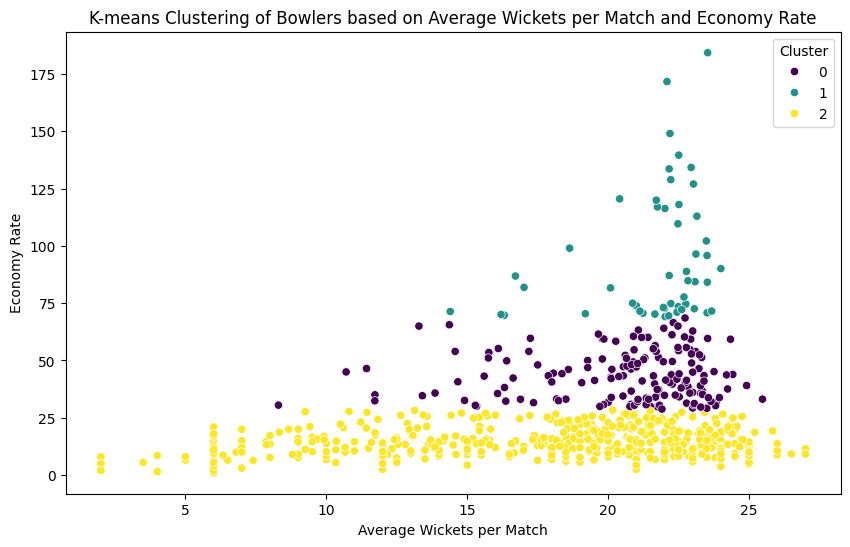

In [25]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bowler_metrics, x='average_wickets_per_match', y='economy_rate', hue='bowler_cluster', palette='viridis')
plt.title('K-means Clustering of Bowlers based on Average Wickets per Match and Economy Rate')
plt.xlabel('Average Wickets per Match')
plt.ylabel('Economy Rate')
plt.legend(title='Cluster')
plt.show()

### **Chi Square Statistics**

In [26]:
from scipy.stats import chi2_contingency

In [27]:
# Merge batsman and bowler metrics on common players
merged_metrics = pd.merge(batsman_metrics, bowler_metrics, left_on='batter', right_on='bowler')

# Create a contingency table
contingency_table = pd.crosstab(merged_metrics['batsman_cluster'], merged_metrics['bowler_cluster'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 17.69167701421852
P-value: 0.001417600496624634


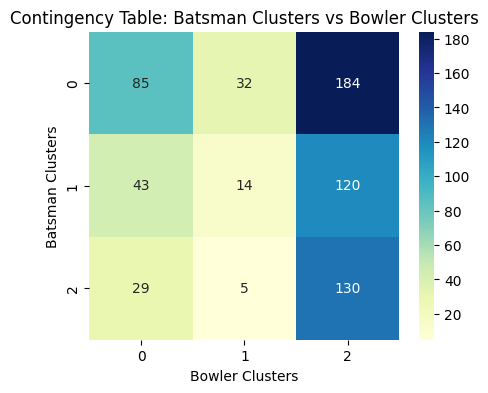

In [28]:
# Plot heatmap of the contingency table
plt.figure(figsize=(5, 4))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: Batsman Clusters vs Bowler Clusters')
plt.xlabel('Bowler Clusters')
plt.ylabel('Batsman Clusters')
plt.show()

In [29]:
# Batsman Metrics: Describe cluster definitions
batsman_cluster_description = batsman_metrics.groupby('batsman_cluster').agg(
    average_score_per_match_mean=('average_score_per_match', 'mean'),
    strike_rate_mean=('strike_rate', 'mean')
)
print("Batsman Cluster Definitions:")
print(batsman_cluster_description)

# Bowler Metrics: Describe cluster definitions
bowler_cluster_description = bowler_metrics.groupby('bowler_cluster').agg(
    average_wickets_per_match_mean=('average_wickets_per_match', 'mean'),
    economy_rate_mean=('economy_rate', 'mean')
)
print("\nBowler Cluster Definitions:")
print(bowler_cluster_description)

Batsman Cluster Definitions:
                 average_score_per_match_mean  strike_rate_mean
batsman_cluster                                                
0                                   11.956633        105.202874
1                                   18.754193        148.713528
2                                    2.888529         45.863682

Bowler Cluster Definitions:
                average_wickets_per_match_mean  economy_rate_mean
bowler_cluster                                                   
0                                    20.493313          43.570894
1                                    21.643039          94.220094
2                                    17.426920          14.097715
